In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
 
plt.style.use('fivethirtyeight')



####  Helper Methods

In [2]:
from sklearn import metrics
from sklearn.metrics import roc_curve
def measure_performance(X, y, clf, show_accuracy=True,show_classification_report=True,
                        show_confusion_matrix=True, show_r2_score=False):
    y_pred = clf.predict(X) 
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format( metrics.accuracy_score(y, y_pred)) )
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred))
    if show_confusion_matrix:
        print("Confusion matrix") 
        print(metrics.confusion_matrix(y, y_pred),)
    if show_r2_score:
        print ("Coefficient of determination:{0:.3f}"
               .format( metrics.r2_score(y, y_pred)))
    return y_pred

In [3]:
def count_plots(train_dataset,categorical,response):
    fig = plt.figure(figsize=(12,10),dpi=300)
    size =len(categorical)
     
    for i in range(size):
        ax = fig.add_subplot(3, 2, i+1)
        sns.countplot(x=categorical[i], hue=response, data=train_dataset,ax=ax)
        sns.despine()
    plt.tight_layout()
    plt.show()


In [4]:
def violin_plots(dataset,categorical_features=None,response = None):
    if categorical_features and response :
        fig = plt.figure(figsize=(12,10),dpi=300)
        size =len(categorical_features)
        for i in range(size):
            ax = fig.add_subplot(4, 4, i+1)
            sns.violinplot(y=categorical_features[i], x="Churn", data=dataset)
        plt.tight_layout()
        plt.show()
        

In [5]:
filename = r'.\data\telecom_churn.csv'
telecom_df = pd.read_csv(filename)
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


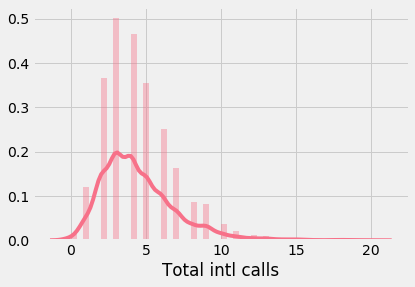

In [6]:
sns.set_palette(sns.color_palette("husl", 8))
sns.distplot(telecom_df['Total intl calls'],norm_hist=True)
plt.show()

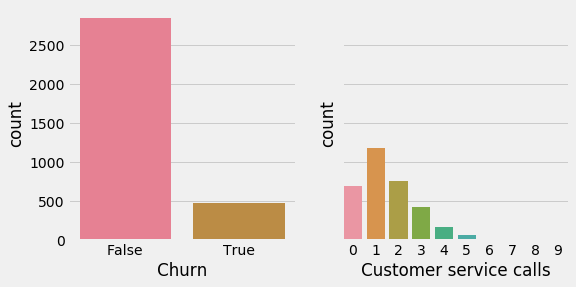

In [7]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
sns.countplot(x='Churn' ,data = telecom_df,ax =axes[0])
sns.countplot(x ='Customer service calls' ,data =telecom_df, ax= axes[1])
plt.show()

In [8]:
telecom_df['International plan'] = pd.factorize(telecom_df['International plan'])[0]
telecom_df['Voice mail plan'] = pd.factorize(telecom_df['Voice mail plan'])[0]
telecom_df['Churn'] = telecom_df['Churn'].astype('int')
states = telecom_df['State']
y = telecom_df['Churn']
telecom_df.drop(['State'], axis=1, inplace=True)

In [9]:
telecom_df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [10]:
#omit_features=['Churn','Account length','Area code','Voice mail plan','Number vmail messages','International plan']
#features  =  [ feature for feature in telecom_df.columns.values if feature not in omit_features]
#violin_plots(telecom_df,categorical_features=features[0:8],response ='Churn') 

In [11]:
#violin_plots(telecom_df,categorical_features=features[8:],response ='Churn') 

In [12]:
#ax = sns.swarmplot(y="Total day calls", x="Churn", data=telecom_df)
#plt.show()

In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
telecom_df.drop(['Churn'], axis=1, inplace=True)
train_X,test_X,train_y,test_y = train_test_split(telecom_df.values,y,test_size=0.3, random_state =17)
knn = KNeighborsClassifier(n_neighbors=10)
dtree = DecisionTreeClassifier(max_depth = 5, random_state =17)
knn.fit(train_X,train_y)
dtree.fit(train_X,train_y)
y_pred_train=measure_performance(train_X,train_y,knn, show_accuracy=True, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

Accuracy:0.879
Classification report
             precision    recall  f1-score   support

          0       0.88      0.99      0.93      1983
          1       0.89      0.22      0.36       350

avg / total       0.88      0.88      0.85      2333

Confusion matrix
[[1973   10]
 [ 272   78]]


In [14]:
y_pred_train=measure_performance(train_X,train_y,dtree, show_accuracy=True, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

Accuracy:0.955
Classification report
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1983
          1       0.94      0.75      0.83       350

avg / total       0.95      0.95      0.95      2333

Confusion matrix
[[1965   18]
 [  88  262]]


In [15]:
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
def plot_learning_curve(train_sizes, train_scores, validation_scores):
    plt.figure()
    plt.title("Learning Curve")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.2, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g" ,label="Cross-validation score")
    plt.ylim(max(-3, validation_scores_mean.min() - .1), train_scores_mean.max() + .1)
    plt.legend(loc="best")
    plt.show()

In [16]:
def test_classifier(model,X,y,cv):
    clf = model.fit(X,y.values.ravel())
    result = clf.score(X,y.values)
    print ("Accuracy: {0:.3f}".format(result*100.0))

    train_sizes, train_scores, validation_scores = learning_curve(clf, X,y.values.ravel(),cv=cv)
    plot_learning_curve(train_sizes, train_scores, validation_scores)
    return clf,result

Accuracy: 87.913


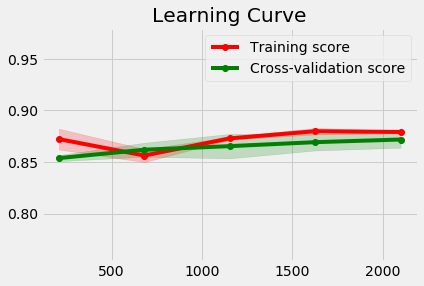

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')


In [17]:
kfold = StratifiedKFold(n_splits=10)
knn_accuracy ,result = test_classifier(knn,train_X,train_y,kfold)
print(knn_accuracy)

Accuracy: 95.456


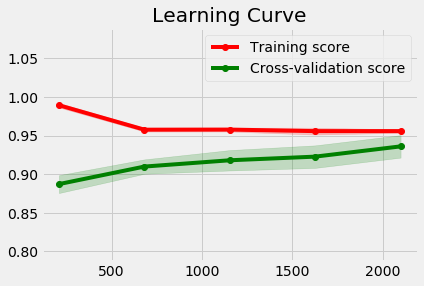

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')


In [18]:
dtree_accuracy ,dtree_result = test_classifier(dtree,train_X,train_y,kfold)
print(dtree_accuracy)

In [19]:
tree_params = { 'max_depth': range(4,11) ,
                'max_features': range(4,19)}
grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid = tree_params,verbose = 1,n_jobs =-1,cv=kfold,)


In [20]:
grid_search.fit(train_X, train_y)

Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   13.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(4, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [21]:
best_dtree = grid_search.best_estimator_
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best parameters: {'max_depth': 6, 'max_features': 16}
Best cross-validation score: 0.94
Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=16, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


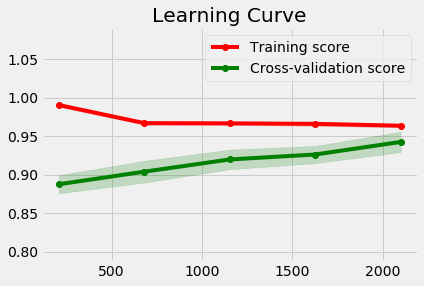

In [22]:
best_dtree.fit(train_X, train_y.values.ravel())
train_sizes, train_scores, validation_scores = learning_curve(best_dtree, train_X,train_y.values.ravel(),cv=kfold)
plot_learning_curve(train_sizes, train_scores, validation_scores)

In [23]:
def plot_roc(X_val,y_val,model):
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.title("roc_curve");
    # find threshold closest to zero:
    close_zero = np.argmin(np.abs(thresholds))
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)
    plt.show()

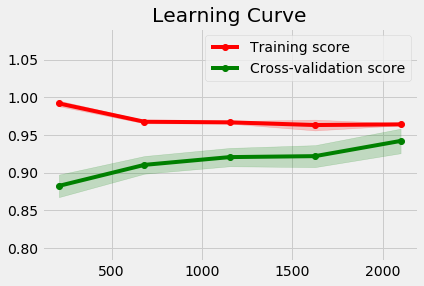

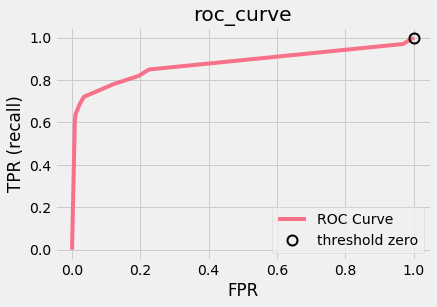

Classification report
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       867
          1       0.90      0.64      0.75       133

avg / total       0.94      0.94      0.94      1000

Confusion matrix
[[858   9]
 [ 48  85]]


In [24]:
def evaluvate_model(clf ,X_trainmodel, y_trainmodel,X_val,y_val): 
    clf.fit(X_trainmodel, y_trainmodel.values.ravel())
    train_sizes, train_scores, validation_scores = learning_curve(clf, 
                                                                  X_trainmodel,y_trainmodel.values.ravel(),cv=kfold)
    plot_learning_curve(train_sizes, train_scores, validation_scores)
    plot_roc(X_val,y_val,clf)
    y_pred=measure_performance(X_val,y_val,clf, show_accuracy=False, 
                               show_classification_report=True,
                               show_confusion_matrix=True, show_r2_score=False)

evaluvate_model(best_dtree,train_X, train_y,test_X,test_y)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_params,cv=5, n_jobs=-1,verbose=True)
knn_grid.fit(train_X, train_y)
best_knn = knn_grid.best_estimator_
print("Best parameters: {}".format(knn_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(knn_grid.best_score_))
print("Best estimator:\n{}".format(knn_grid.best_estimator_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'knn__n_neighbors': 7}
Best cross-validation score: 0.89
Best estimator:
Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
           weights='uniform'))])


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   10.9s finished


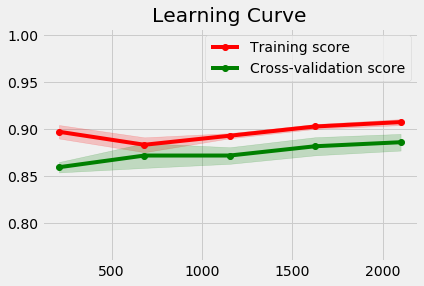

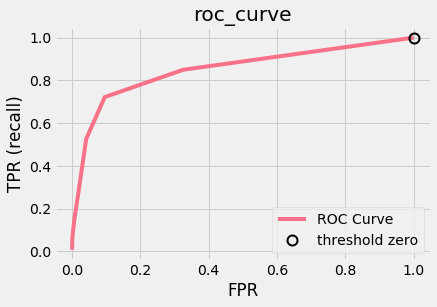

Classification report
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       867
          1       0.68      0.32      0.44       133

avg / total       0.87      0.89      0.87      1000

Confusion matrix
[[847  20]
 [ 90  43]]


In [26]:
evaluvate_model(best_knn,train_X, train_y,test_X,test_y)

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest_params = {'max_depth': range(1,11),
                 'max_features': range(4,19)}
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)
forest_grid = GridSearchCV(forest, forest_params,cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(train_X, train_y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  4.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

Best parameters: {'max_depth': 9, 'max_features': 6}
Best cross-validation score: 0.95
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False)


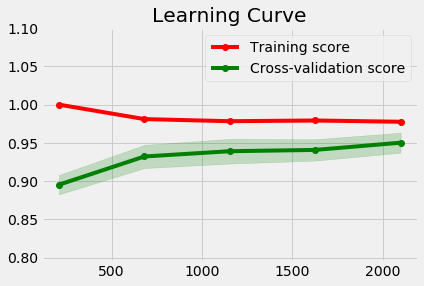

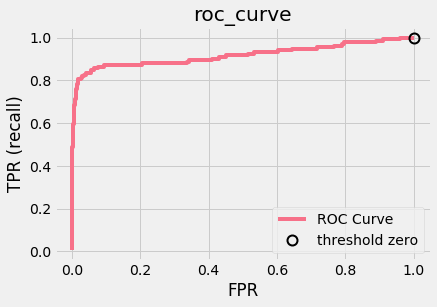

Classification report
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       867
          1       0.92      0.71      0.80       133

avg / total       0.95      0.95      0.95      1000

Confusion matrix
[[859   8]
 [ 39  94]]


In [28]:
best_forest = forest_grid.best_estimator_
print("Best parameters: {}".format(forest_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(forest_grid.best_score_))
print("Best estimator:\n{}".format(forest_grid.best_estimator_))
evaluvate_model(best_forest,train_X, train_y,test_X,test_y)

---
For simple models, training and validation errors are close and large. This suggests that the model underfitted, meaning it does not have a sufficient number of parameters.

For highly sophisticated models, training and validation errors differ significantly. This can be explained by overfitting. When there are too many parameters or regularization is not strict enough, the algorithm can be "distracted" by the noise in the data and lose track of the overall trend.

---